# Picnic Hackathon 🥇✅💯
 **When great customer support meets data**


## Why the challenge?
One of our core beliefs is to offer our customers the best support possible, by allowing them, for example, to send in pictures of defect products they wish to be reimbursed for. But processing these pictures is very time-consuming as it is all done manually.

## What is the challenge?
The challenge we propose is the following: As a first step in helping customer support, come up with a way of labeling every picture that comes in according to the product that is in the picture. To keep with the Picnic spirit, we encourage to be as innovative and creative with your solutions as possible.

## Dataset
To that end, we offer the following [dataset](https://github.com/Younes-Charfaoui/Picnic-Hackathon/blob/master/images/picnic_logo.png) of pictures of defect items.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras_preprocessing.image import ImageDataGenerator

path_to_folder = 'gdrive/My Drive/Dataset/The Picnic Hackathon 2019/'

In [0]:
df = pd.read_csv(path_to_folder + "train.tsv",  sep='\t')

In [0]:
datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.3)

In [24]:
train_generator = datagen.flow_from_dataframe(dataframe=df, directory=path_to_folder + "train/", 
                                              x_col="file", y_col="label", 
                                              class_mode="categorical", 
                                              target_size=(32,32), 
                                              batch_size=32 ,
                                              subset = "training")

valid_generator = datagen.flow_from_dataframe(dataframe=df, directory=path_to_folder + "train/", 
                                              x_col="file", y_col="label", 
                                              class_mode="categorical", 
                                              target_size=(32,32), 
                                              batch_size=32,
                                              subset = "validation")

Found 5081 images belonging to 25 classes.
Found 2177 images belonging to 25 classes.


In [0]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}

In [9]:
print(labels)

{0: 'Asparagus, string beans & brussels sprouts', 1: 'Bananas, apples & pears', 2: 'Bell peppers, zucchinis & eggplants', 3: 'Berries & cherries', 4: 'Broccoli, cauliflowers, carrots & radish', 5: 'Cheese', 6: 'Citrus fruits', 7: 'Cucumber, tomatoes & avocados', 8: 'Eggs', 9: 'Fish', 10: 'Fresh bread', 11: 'Fresh herbs', 12: 'Kiwis, grapes & mango', 13: 'Lunch & Deli Meats', 14: 'Milk', 15: 'Minced meat & meatballs', 16: 'Nectarines, peaches & apricots', 17: 'Onions, leek, garlic & beets', 18: 'Pineapples, melons & passion fruit', 19: 'Pork, beef & lamb', 20: 'Potatoes', 21: 'Poultry', 22: 'Pre-baked breads', 23: 'Pudding, yogurt & quark', 24: 'Salad & cress'}


In [0]:
time = train_generator.n//train_generator.batch_size
x_train = []
y_train = []
for i in range(time):
  print(i)
  X, y = train_generator.next()
  x_train.append(X)
  y_train.append(y)

In [0]:
time = valid_generator.n//valid_generator.batch_size
x_valid = []
y_valid = []
for i in range(time):
  print(i)
  X, y = valid_generator.next()
  x_valid.append(X)
  y_valid.append(y)

In [0]:
xx_train  = []
for i in range(len(x_train)):
  for img in x_train[i]:
    xx_train.append(img)

In [0]:
yy_train  = []
for i in range(len(y_train)):
  for img in y_train[i]:
    yy_train.append(img)

In [0]:
xx_valid  = []
for i in range(len(x_valid)):
  for img in x_valid[i]:
    xx_valid.append(img)
    
yy_valid  = []
for i in range(len(y_valid)):
  for img in y_train[i]:
    yy_valid.append(img)

In [98]:
len(xx_train)

5056

In [0]:
from sklearn.model_selection import train_test_split
img_train, img_test, lbl_train, lbl_test, = train_test_split(xx_train, yy_train, shuffle = True, test_size = 0.3)

In [0]:
X_valid, y_valid = valid_generator.next()

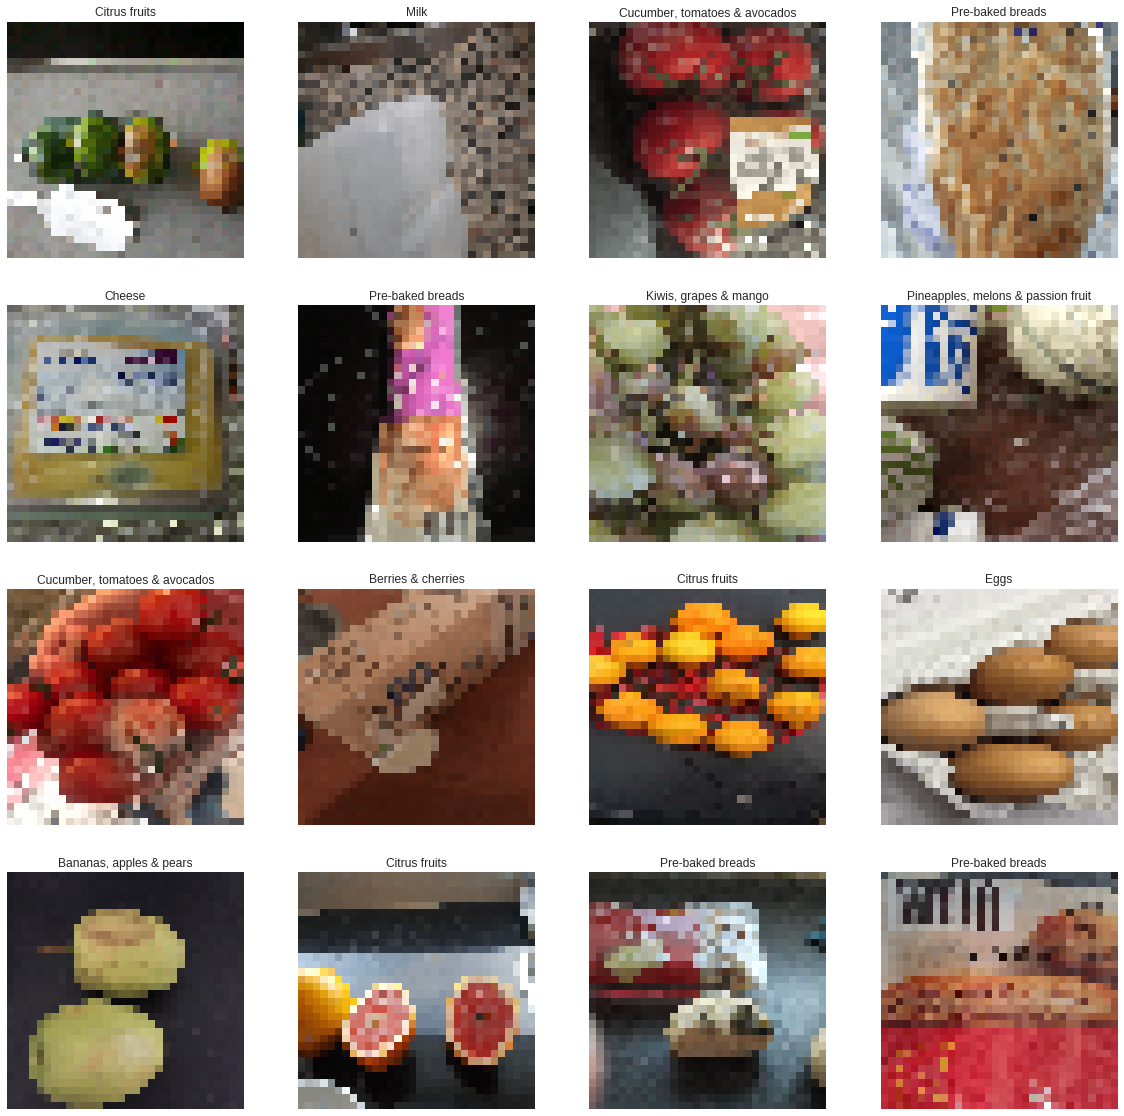

In [54]:
fig = plt.figure(figsize = (20,20))
for i in range(16):
  ax = fig.add_subplot(4,4, i+1, xticks = [], yticks = [])
  ax.imshow(xx_train[i])
  ax.set_title(labels[np.argmax(yy_train[i])])

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Activation, Dense, Flatten

In [56]:
# Building simple model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2097664   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
__________

In [0]:
model.compile(optimizer = 'rmsprop', loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size

In [64]:
history = model.fit([xx_train], [yy_train], epochs=100, batch_size = 32)

Epoch 1/100
5056/5056 [==============================] - 1s 290us/step - loss: 1.2431 - acc: 0.6313
Epoch 2/100
5056/5056 [==============================] - 1s 286us/step - loss: 1.1046 - acc: 0.6681
Epoch 3/100
5056/5056 [==============================] - 1s 278us/step - loss: 0.9912 - acc: 0.7017
Epoch 4/100
5056/5056 [==============================] - 1s 284us/step - loss: 0.9125 - acc: 0.7294
Epoch 5/100
5056/5056 [==============================] - 1s 282us/step - loss: 0.8249 - acc: 0.7435
Epoch 6/100
5056/5056 [==============================] - 1s 282us/step - loss: 0.7169 - acc: 0.7894
Epoch 7/100
5056/5056 [==============================] - 1s 285us/step - loss: 0.6537 - acc: 0.8072
Epoch 8/100
5056/5056 [==============================] - 1s 283us/step - loss: 0.5794 - acc: 0.8261
Epoch 9/100
5056/5056 [==============================] - 1s 288us/step - loss: 0.5355 - acc: 0.8362
Epoch 10/100
5056/5056 [==============================] - 1s 283us/step - loss: 0.4810 - acc: 0.8588

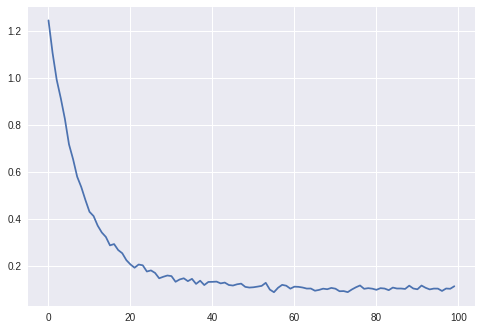

In [65]:
plt.plot(history.history['loss'])
plt.show()

In [0]:
history = model.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=STEP_SIZE_TRAIN)

In [66]:
score = model.evaluate_generator(valid_generator, steps = valid_generator.n//valid_generator.batch_size, workers=12)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [67]:
print('Accuracy of {}%'.format(score[1]*100))

Accuracy of 26.946386946386948%


In [111]:
# Building some complex models
model = Sequential()
model.add(Conv2D(16, kernel_size = (1,1), padding= 'same', input_shape = (32,32,3), activation = 'relu'))
model.add(Conv2D(16, kernel_size = (1,1), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 1))
model.add(Conv2D(32, kernel_size = (2,2), padding= 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (2,2), padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 16)        272       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        2080      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 64)        0         
__________

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [113]:
history = model.fit([img_train], [lbl_train], epochs=100, batch_size = 32)

Epoch 1/100
3539/3539 [==============================] - 8s 2ms/step - loss: 3.0147 - acc: 0.1390
Epoch 2/100
3539/3539 [==============================] - 6s 2ms/step - loss: 2.6806 - acc: 0.2122
Epoch 3/100
3539/3539 [==============================] - 6s 2ms/step - loss: 2.3122 - acc: 0.3100
Epoch 4/100
3539/3539 [==============================] - 6s 2ms/step - loss: 1.6498 - acc: 0.5103
Epoch 5/100
3539/3539 [==============================] - 6s 2ms/step - loss: 0.7976 - acc: 0.7703
Epoch 6/100
3539/3539 [==============================] - 6s 2ms/step - loss: 0.3082 - acc: 0.9124
Epoch 7/100
3539/3539 [==============================] - 6s 2ms/step - loss: 0.1383 - acc: 0.9635
Epoch 8/100
3539/3539 [==============================] - 6s 2ms/step - loss: 0.0899 - acc: 0.9794
Epoch 9/100
3539/3539 [==============================] - 7s 2ms/step - loss: 0.0558 - acc: 0.9867
Epoch 10/100
3539/3539 [==============================] - 6s 2ms/step - loss: 0.0501 - acc: 0.9881
Epoch 11/100
3539/3

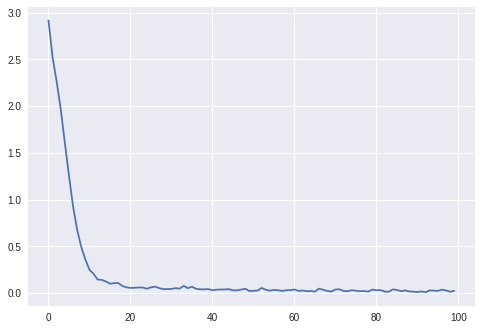

In [106]:
plt.plot(history.history['loss'])
plt.show()

In [108]:
score = model.evaluate([img_test] , [lbl_test])
print('Accuracy of {}%'.format(score[1]*100))

1517/1517 [==============================] - 0s 103us/step
Accuracy of 22.940013188827013%


In [82]:
score = model.evaluate_generator(valid_generator, steps = valid_generator.n//valid_generator.batch_size, workers=12)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [83]:
print('Accuracy of {}%'.format(score[1]*100))

Accuracy of 28.717948717948715%


In [0]:
from keras.applications.resnet50 import ResNet50
model = ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=25)


In [119]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [124]:
history = model.fit([img_train], [lbl_train], epochs=100, batch_size = 32)

Epoch 1/100
3539/3539 [==============================] - 45s 13ms/step - loss: 4.0779 - acc: 0.1034
Epoch 2/100
3539/3539 [==============================] - 23s 6ms/step - loss: 3.3894 - acc: 0.1678
Epoch 3/100
3539/3539 [==============================] - 23s 6ms/step - loss: 3.4476 - acc: 0.1613
Epoch 4/100
3539/3539 [==============================] - 22s 6ms/step - loss: 3.1562 - acc: 0.2006
Epoch 5/100
3539/3539 [==============================] - 22s 6ms/step - loss: 2.8773 - acc: 0.2684
Epoch 6/100
3539/3539 [==============================] - 22s 6ms/step - loss: 2.9808 - acc: 0.2512
Epoch 7/100
3539/3539 [==============================] - 22s 6ms/step - loss: 3.2829 - acc: 0.1707
Epoch 8/100
3539/3539 [==============================] - 22s 6ms/step - loss: 3.4139 - acc: 0.1642
Epoch 9/100
3539/3539 [==============================] - 22s 6ms/step - loss: 3.1932 - acc: 0.1865
Epoch 10/100
3539/3539 [==============================] - 22s 6ms/step - loss: 3.1163 - acc: 0.2020
Epoch 11

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate([img_test] , [lbl_test])
print('Accuracy of RESNET {}%'.format(score[1]*100))